In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
dim_category = pd.read_csv('dim_category.csv') 
dim_compfactors = pd.read_csv('dim_compfactors.csv') 
dim_description = pd.read_csv('dim_description.csv') 
dim_product = pd.read_csv('dim_product.csv') 
dim_type = pd.read_csv('dim_type.csv') 
dim_year = pd.read_csv('dim_year.csv') 
fact_emissions = pd.read_csv('fact_emissions.csv') 

In [5]:
dim_type.head

<bound method NDFrame.head of           TypeName  PK_EmissionType
0  Gross emissions            30001
1  Carbon removals            30002>

In [6]:
dim_category

,categoryName,PK_category
0,Corporate emissions,40001
1,Product life cycle emissions,40002


In [7]:
dim_description.head

<bound method NDFrame.head of                      Scope                                        Description  \
0                  Scope 1                       Natural gas, diesel, propane   
1                  Scope 1                                     Fleet vehicles   
2                  Scope 1          Other (R&D processes & refrigerant leaks)   
3   Scope 2 (market-based)                                        Electricity   
4   Scope 2 (market-based)                        Steam, heating, and cooling   
5                  Scope 3                                    Business travel   
6                  Scope 3                                   Employee commute   
7                  Scope 3                                      Upstream fuel   
8                  Scope 3                      Work from home (market-based)   
9                  Scope 3  Transmission and distribution loss (market-based)   
10                 Scope 3                   Third-party cloud (market-based)  

In [8]:
fact_emissions.head
fact_emissions = fact_emissions[fact_emissions['Emissions'] >= 0]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X = fact_emissions.drop('Emissions', axis=1)
y = fact_emissions['Emissions']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 19827991306.034252
R^2 Score: 0.9994314758385693


In [12]:
print(fact_emissions['Emissions'].describe())


count    4.440000e+02
mean     2.435144e+06
std      6.034422e+06
min      0.000000e+00
25%      7.325932e+03
50%      4.915200e+04
75%      1.201245e+06
max      3.079560e+07
Name: Emissions, dtype: float64


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")
'''Given your earlier summary statistics, where the emissions values can go up to several million, 
an RMSE of around 140,812 may be relatively small. This suggests that your model is performing quite well overall,
especially considering the high variability in the emissions data.'''


Root Mean Squared Error: 140811.90044181014


'Given your earlier summary statistics, where the emissions values can go up to several million, \nan RMSE of around 140,812 may be relatively small. This suggests that your model is performing quite well overall,\nespecially considering the high variability in the emissions data.'

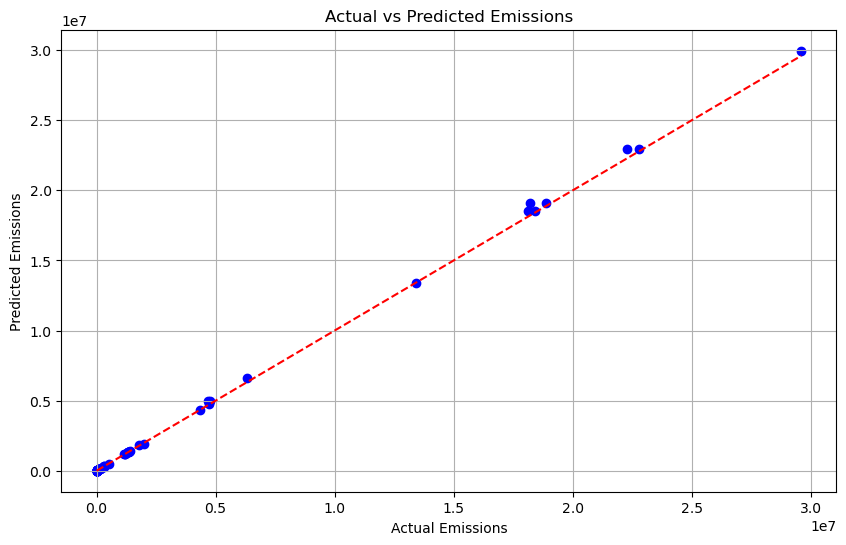

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Emissions')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.grid()
plt.show()

In [15]:
emission_type_dict = pd.Series(dim_type.TypeName.values, index=dim_type.PK_EmissionType).to_dict()
category_dict = pd.Series(dim_category.categoryName.values, index=dim_category.PK_category).to_dict()
descr_dict = pd.Series(dim_description.Description.values, index=dim_description.PK_description).to_dict()


In [16]:
descr_dict

{50001: 'Natural gas, diesel, propane',
 50002: 'Fleet vehicles',
 50003: 'Other (R&D processes & refrigerant leaks)',
 50004: 'Electricity',
 50005: 'Steam, heating, and cooling',
 50006: 'Business travel',
 50007: 'Employee commute',
 50008: 'Upstream fuel',
 50009: 'Work from home (market-based)',
 50010: 'Transmission and distribution loss (market-based)',
 50011: 'Third-party cloud (market-based)',
 50012: 'Corporate carbon offsets',
 50013: 'Manufacturing (purchased goods and services)',
 50014: 'Product transportation (upstream and downstream)',
 50015: 'Product use (use of sold products)',
 50016: 'End-of-life processing',
 50017: 'Product carbon offsets'}

In [17]:
category_dict

{40001: 'Corporate emissions', 40002: 'Product life cycle emissions'}

In [18]:
emission_type_dict

{30001: 'Gross emissions', 30002: 'Carbon removals'}

In [19]:
fact_emissions2=fact_emissions.copy()
fact_emissions2['EmissionType'] = fact_emissions['PK_EmissionType'].map(emission_type_dict)
fact_emissions2['Category'] = fact_emissions['PK_category'].map(category_dict)
fact_emissions2['Description'] = fact_emissions['PK_description'].map(descr_dict)


In [20]:
fact_emissions2.head

<bound method NDFrame.head of      PK_EmissionType  PK_category  PK_description  PK_year     Emissions  \
0              30001        40001           50001    60001  39700.000000   
1              30001        40001           50002    60001  12600.000000   
2              30001        40001           50003    60001   2900.000000   
3              30001        40001           50004    60001  17795.727046   
4              30001        40001           50005    60001   3000.000000   
..               ...          ...             ...      ...           ...   
477            30001        40001           50009    60007   1500.000000   
480            30001        40001           50003    60008   3445.000000   
481            30001        40001           50005    60008   1156.000000   
482            30001        40001           50008    60008   2120.000000   
483            30001        40001           50009    60008   1500.000000   

        EmissionType             Category  \
0    Gross e

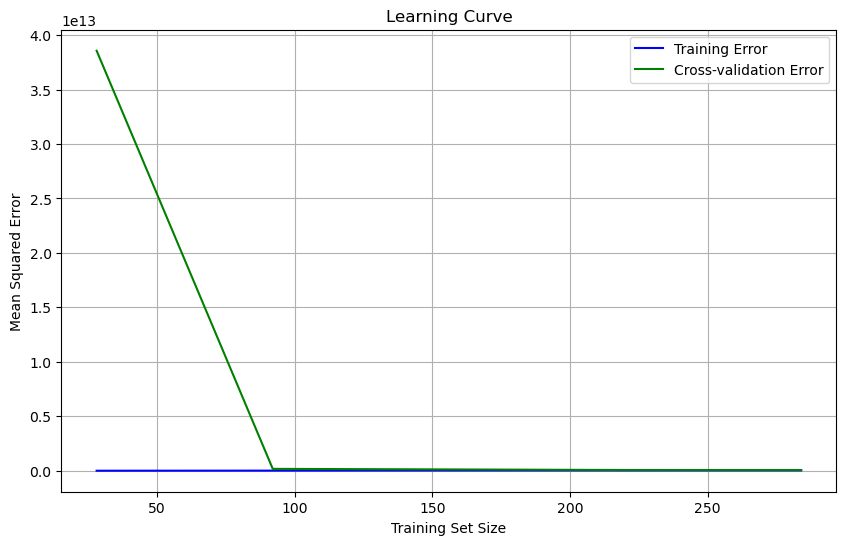

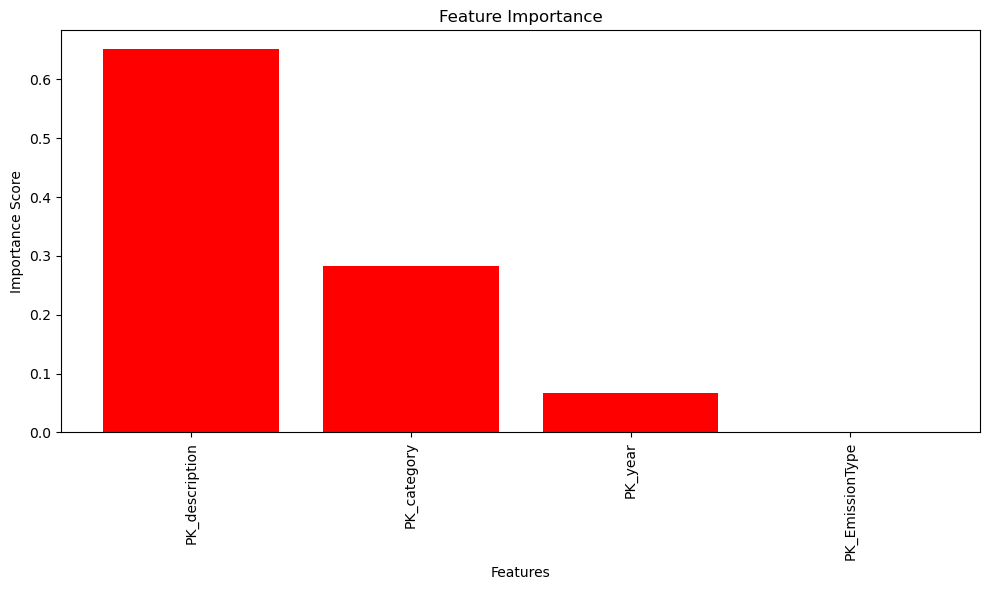

In [39]:
from sklearn.model_selection import learning_curve
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Error", color="green")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()

# Feature Importance (for models like RandomForestRegressor)
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()